<a href="https://colab.research.google.com/github/hosseinrezaie0/CI---T.A/blob/main/Neural%20Network/Perceptron/CI_NN_Perceptron_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Load the dataset
data = pd.read_csv('/content/SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

In [3]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data['label'] = data['label'].map({'ham':0, 'spam':1})

In [5]:
data['label'].value_counts()

,count
label,
0,4825
1,747


In [6]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

In [8]:
x_train.shape

(4457,)

In [9]:
x_train.head()

,message
1978,Reply to win £100 weekly! Where will the 2006 ...
3989,Hello. Sort of out in town already. That . So ...
3935,How come guoyang go n tell her? Then u told her?
4078,Hey sathya till now we dint meet not even a si...
4086,Orange brings you ringtones from all time Char...


In [10]:
y_train[:5]

,label
1978,1
3989,0
3935,0
4078,0
4086,1


In [19]:
# Text preprocessing and vectorization
vectorizer = TfidfVectorizer(max_features=5000)
x_train_vec = vectorizer.fit_transform(x_train).toarray()
x_test_vec = vectorizer.transform(x_test).toarray()

In [12]:
x_train_vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# Build the model
model = Sequential(
    [
        Dense(128, activation="relu", input_shape=(x_train_vec.shape[1],)),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(1, activation="sigmoid"),
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [15]:
history = model.fit(x_train_vec, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8094 - loss: 0.5097 - val_accuracy: 0.8453 - val_loss: 0.2045
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9421 - loss: 0.1238 - val_accuracy: 0.9731 - val_loss: 0.0839
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0353 - val_accuracy: 0.9753 - val_loss: 0.0796
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9975 - loss: 0.0148 - val_accuracy: 0.9821 - val_loss: 0.0798
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 0.0064 - val_accuracy: 0.9821 - val_loss: 0.0914


In [16]:
loss_train = history.history['loss']
acc_train = history.history['accuracy']
loss_val = history.history['val_loss']
acc_val = history.history['val_accuracy']

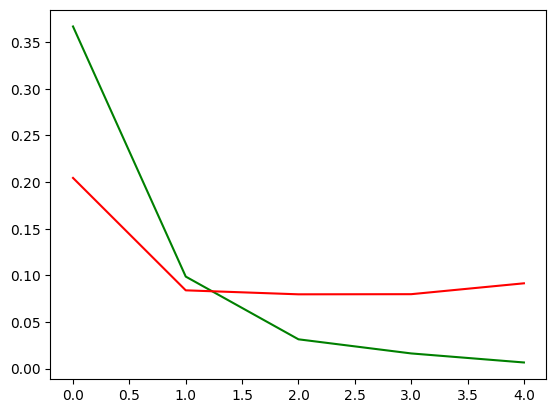

In [17]:
plt.plot(loss_train, label='Training Loss', color='g')
plt.plot(loss_val, label='Validation Loss', color='r')

In [20]:
loss, acc = model.evaluate(x_test_vec, y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9855 - loss: 0.0764
